In [4]:
# import required libraries
import wave
import numpy as np

import sounddevice as sd
from scipy.io.wavfile import write
import wavio as wv
from pydub import AudioSegment

import soundfile as sf

import matplotlib.pyplot as plt

/home/un/anaconda3/lib/python3.11/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [2]:
# Sampling frequency
freq = 44100

# Recording duration
duration = 5

In [7]:
# Start recorder with the given values of 
# duration and sample frequency

# Sampling frequency
freq = 44100
duration = 5

recording = sd.rec(int(duration * freq), samplerate=freq, channels=2)
sd.wait()
audio_segment = AudioSegment(data=recording.tobytes(), sample_width=recording.dtype.itemsize, frame_rate=freq, channels=2)
audio_segment.export("recording1.wav", format="wav")
sf.write("recording.wav", recording, freq)
write("recording2.wav", freq, recording)

obj = wave.open('recording.wav', 'rb')

In [8]:
print('Number of channels', obj.getnchannels())
print('sample width', obj.getsampwidth())
print('frame rate', obj.getframerate())
print('Number of frames', obj.getnframes())
print('parameters', obj.getparams())
# print('Number of channels', obj.getnchannels())

Number of channels 2
sample width 2
frame rate 44100
Number of frames 220500
parameters _wave_params(nchannels=2, sampwidth=2, framerate=44100, nframes=220500, comptype='NONE', compname='not compressed')


In [10]:
type(signal_wave[0])

int

In [9]:
obj = wave.open('recording.wav', 'rb')

signal_wave = obj.readframes(-1)

print(type(signal_wave), type(signal_wave[0]))
print('signal_wave', len(signal_wave))
signal_array = np.frombuffer(signal_wave, dtype=np.int16)
print('signal_array', len(signal_array))
t_audio = obj.getnframes()/obj.getframerate()
times = np.linspace(0, t_audio, num=len(signal_wave)//2)

obj.close()

<class 'bytes'> <class 'int'>
signal_wave 882000
signal_array 441000


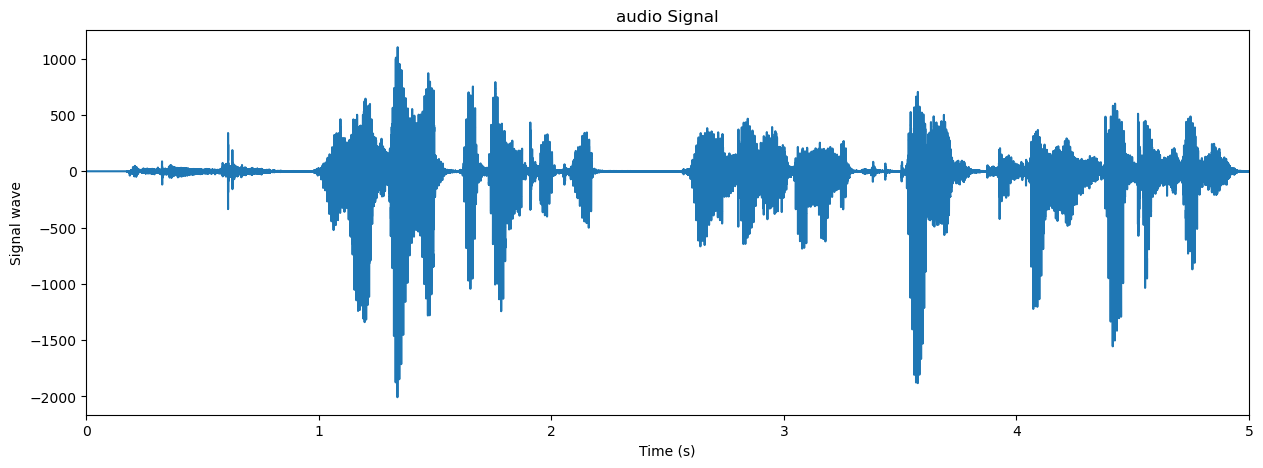

In [11]:
plt.figure(figsize=(15,5))
plt.plot(times, signal_array)

plt.title("audio Signal")
plt.ylabel('Signal wave')
plt.xlabel('Time (s)')
plt.xlim(0, t_audio)
plt.show()

In [1]:
import pyaudio
import wave

FRAMES_PER_BUFFER = 3200
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 16000

p = pyaudio.PyAudio()

stream = p.open(
    format=FORMAT,
    channels=CHANNELS,
    rate=RATE,
    input=True,
    frames_per_buffer=FRAMES_PER_BUFFER
)

print('start recording')

seconds = 5
frames = []

for i in range(0, int(RATE/FRAMES_PER_BUFFER*seconds)):
    data = stream.read(FRAMES_PER_BUFFER)
    frames.append(data)

stream.stop_stream()
stream.close()
p.terminate()


obj = wave.open('output.wav', 'wb')
obj.setnchannels(CHANNELS)
obj.setsampwidth(p.get_sample_size(FORMAT))
obj.setframerate(RATE)
obj.writeframes(b''.join(frames))
obj.close()

ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.rear
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.center_lfe
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.side
ALSA lib pcm_route.c:877:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_route.c:877:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_route.c:877:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_route.c:877:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_oss.c:397:(_snd_pcm_oss_open) Cannot open device /dev/dsp
ALSA lib pcm_oss.c:397:(_snd_pcm_oss_open) Cannot open device /dev/dsp
ALSA lib confmisc.c:160:(snd_config_get_card) Invalid field card
ALSA lib pcm_usb_stream.c:482:(_snd_pcm_usb_stream_open) Invalid card 'card'
ALSA lib confmisc.c:160:(snd_config_get_card) Invalid field card
ALSA lib pcm_usb_stream.c:482:(_snd_pcm_usb_stream_open) Invalid card 'card'


start recording


In [6]:
obj = wave.open('output.wav', 'rb')

signal_wave = obj.readframes(-1)

print(type(signal_wave), type(signal_wave[0]))
print('signal_wave', len(signal_wave))
signal_array = np.frombuffer(signal_wave, dtype=np.int16)
print('signal_array', len(signal_array))
t_audio = obj.getnframes()/obj.getframerate()
times = np.linspace(0, t_audio, num=len(signal_wave)//2)

obj.close()

<class 'bytes'> <class 'int'>
signal_wave 160000
signal_array 80000


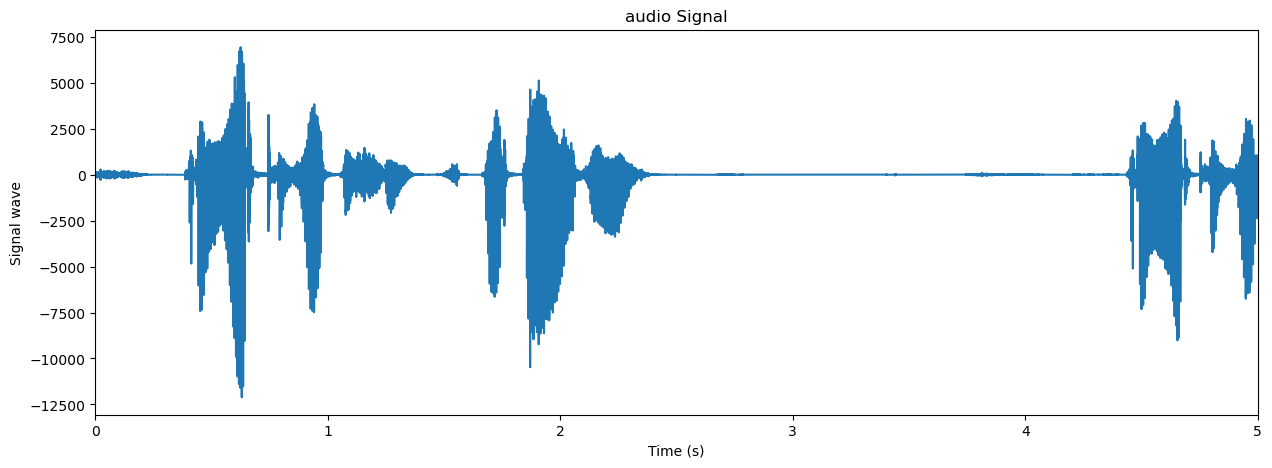

In [7]:
plt.figure(figsize=(15,5))
plt.plot(times, signal_array)

plt.title("audio Signal")
plt.ylabel('Signal wave')
plt.xlabel('Time (s)')
plt.xlim(0, t_audio)
plt.show()

In [175]:
from pydub import AudioSegment

audio = AudioSegment.from_mp3('file_example_MP3_700KB.mp3')

Defaulting to user installation because normal site-packages is not writeable
